<a href="https://colab.research.google.com/github/DanielSzarek/175IC-machine-learning/blob/main/zad%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import LocalOutlierFactor

sns.set(font_scale=1.2)
np.random.seed(26)

data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

tmp = pd.DataFrame(data=data, columns={'x1', 'x2'})
px.scatter(tmp, x='x1', y='x2', template='plotly_dark')

In [8]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x='x1', y='x2', width=500, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, x='x1', y='x2', width=500)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_layout(template='plotly_dark')
fig.show()

Neighbors: 1
n_samples: 300
cluster_std: 2.0
random_state: 10


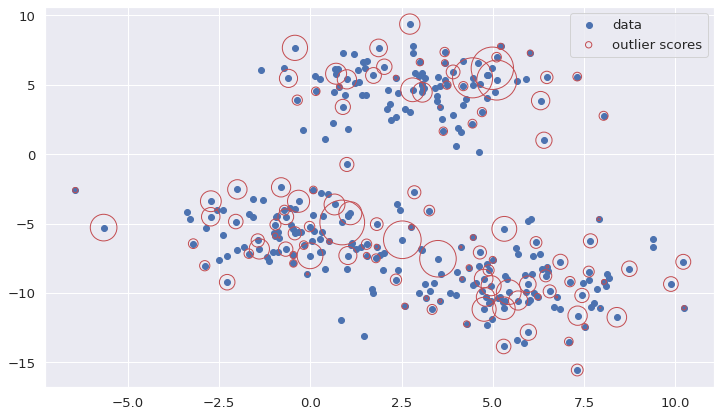

Neighbors: 6
n_samples: 300
cluster_std: 2.0
random_state: 10


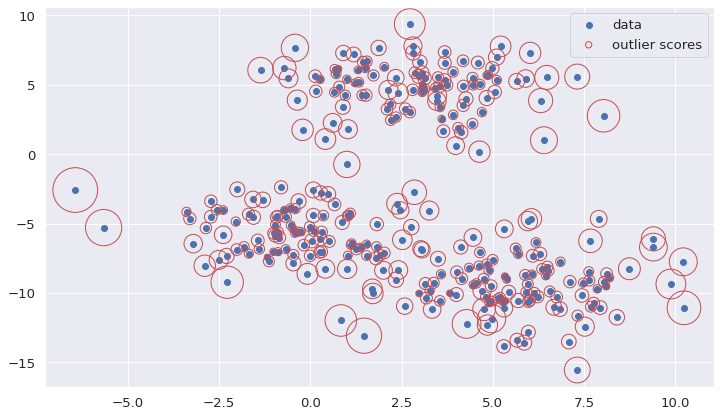

Neighbors: 11
n_samples: 300
cluster_std: 2.0
random_state: 10


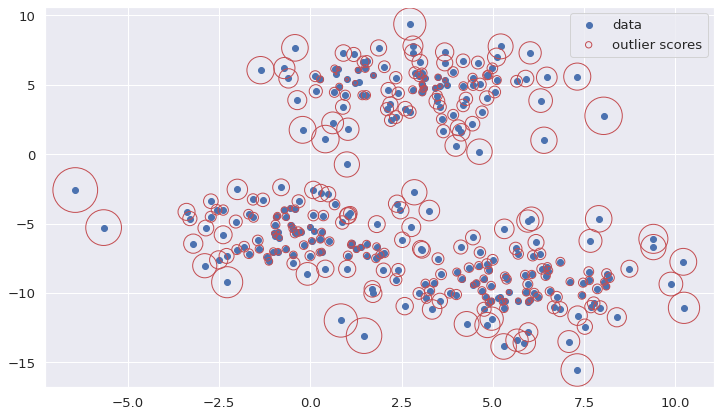

Neighbors: 16
n_samples: 300
cluster_std: 2.0
random_state: 10


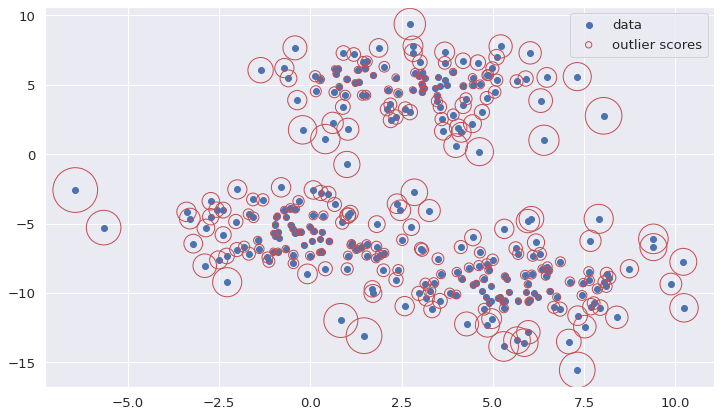

Neighbors: 1
n_samples: 100
cluster_std: 1.0
random_state: 5


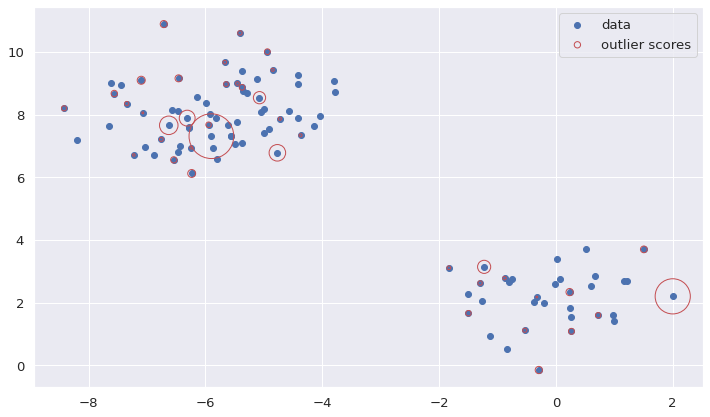

Neighbors: 6
n_samples: 100
cluster_std: 1.0
random_state: 5


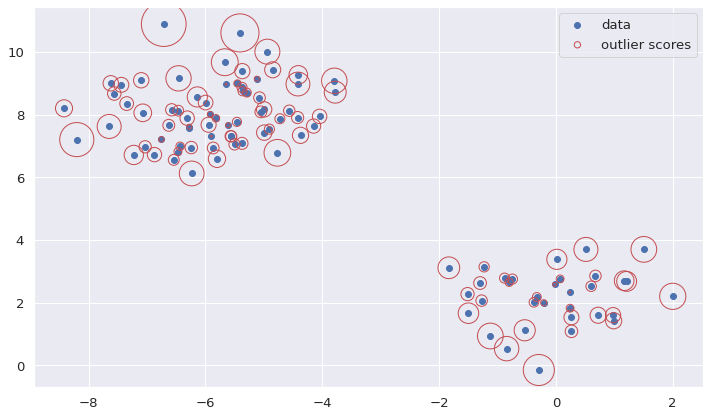

Neighbors: 11
n_samples: 100
cluster_std: 1.0
random_state: 5


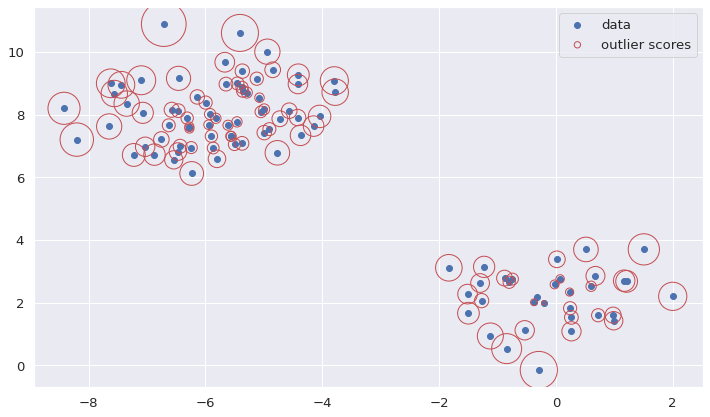

Neighbors: 16
n_samples: 100
cluster_std: 1.0
random_state: 5


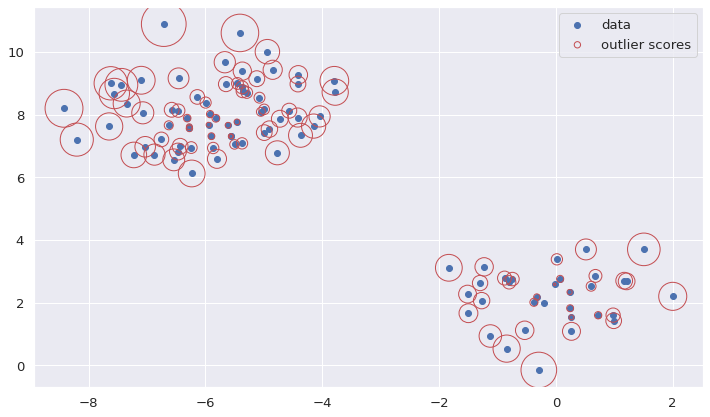

Neighbors: 1
n_samples: 500
cluster_std: 5.0
random_state: 15


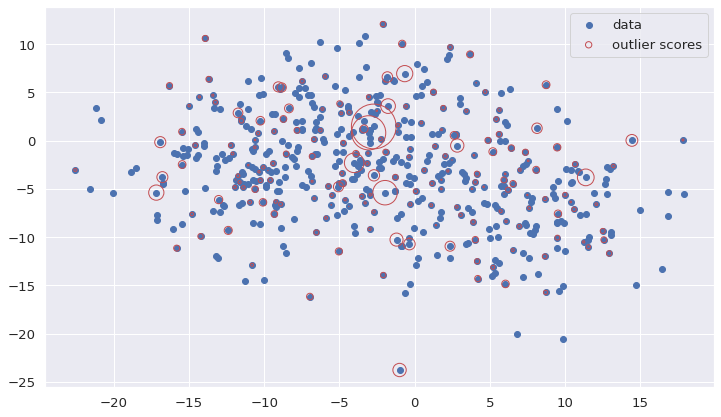

Neighbors: 6
n_samples: 500
cluster_std: 5.0
random_state: 15


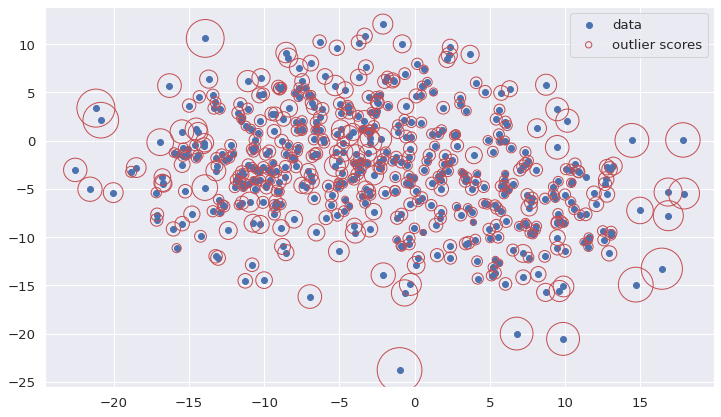

Neighbors: 11
n_samples: 500
cluster_std: 5.0
random_state: 15


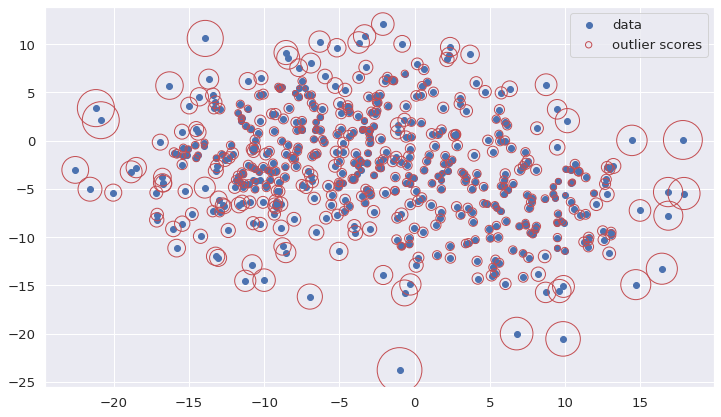

Neighbors: 16
n_samples: 500
cluster_std: 5.0
random_state: 15


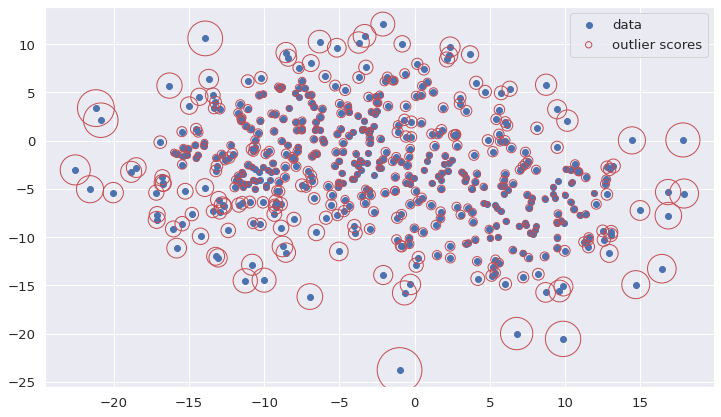

"\nI tried many various random.seed amount but I didn't see big differences. \n"

In [13]:
def lof_plot(data, tmp, neighbors):
  lof = LocalOutlierFactor(n_neighbors=neighbors)
  y_pred = lof.fit_predict(data)

  all_data = np.c_[data, y_pred]
  all_data[:5]

  tmp['y_pred'] = y_pred
  px.scatter(tmp, x='x1', y='x2', color='y_pred', template='plotly_dark')
  lof_scores = lof.negative_outlier_factor_
  radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())
  radius[:5]

  plt.figure(figsize=(12, 7))
  plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
  plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
  legend = plt.legend()
  legend.legendHandles[1]._sizes = [40]
  plt.show()

# As in the task, I will make 3 different examples: n_samples=300, cluster_std=2.0, random_state=10
data_for_make_blobs = [[300, 2.0, 10], [100, 1.0, 5], [500, 5.0, 15]]
for data_mb in data_for_make_blobs:
  data = make_blobs(n_samples=data_mb[0], cluster_std=data_mb[1], random_state=data_mb[2])[0]
  data[:5]
  tmp = pd.DataFrame(data=data, columns={'x1', 'x2'})

  for n in range(1, 21, 5):
    print(f"Neighbors: {n}")
    print(f"n_samples: {data_mb[0]}")
    print(f"cluster_std: {data_mb[1]}")
    print(f"random_state: {data_mb[2]}")
    lof_plot(data, tmp, n)


"""
I tried many various random.seed values but I didn't see big differences in returned data and plots.
I think that there is no perfect 'k' value. However as you can see values higher than 6 definitely get rid of a problem with small groups.
The max value of 'k' depends on a size of dataset. In smaller datasets, we should be careful and value of neighbours should be lower. I didn't notice a problems in my datasets with higher values.
"""